# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

In this project we are taking a look at E-news Express's dataset which is used to see whether or not the new landing page is successful in gathering new subscribers. In doing so, we will take a look at the data and answer a four different questions, listed below.

## Import all the necessary libraries

In [ ]:
# Importing the appropriate libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [ ]:
# Moute google drive in order to read the data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab/abtest.csv')
# returns the first 10 rows
df.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Use the head function to look at the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Use the head function to look at the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# By using .shape we can see that our dataset has 100 rows and 6 columns
df.shape

(100, 6)

In [ ]:
# Use this to find missing values in each column
df.isnull().sum()
# We can see that there are no misisng values in any of the columns.

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
# Use this to find duplicate entries in the dataset
df.duplicated().sum()
# In this dataset we have no duplicates

0

In [ ]:
# Use .info() in order to find out which variables are numerical or categorical
df.info()
# We can see that there are only two numerical values, user_id and time_spent_on_page

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# Use this to find statistical data about the numerical variables
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
# We can use .value_counts to find statistical information about the categorical data
df['group'].value_counts()
# We can see that there is no error in the experiment since the control and treatment have equal sample size.

control      50
treatment    50
Name: group, dtype: int64

In [ ]:
df['landing_page'].value_counts()
# Once again there is no error in the experiment and the groups were equally seperated.

old    50
new    50
Name: landing_page, dtype: int64

In [ ]:
df['converted'].value_counts()
# We can see that there were more people that were converted rather than not.

yes    54
no     46
Name: converted, dtype: int64

In [ ]:
df['language_preferred'].value_counts()
# The languages are used equally meaning that the sample size is equally diverse.

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

### Univariate Analysis

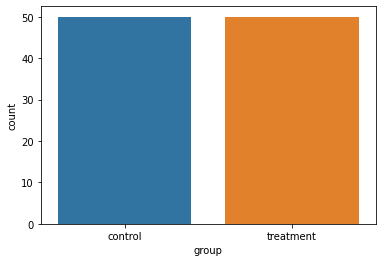

In [ ]:
# We can use a count plot in order to visual the different group and the ammount of users in both groups.
sns.countplot(data=df, x='group')
plt.show()

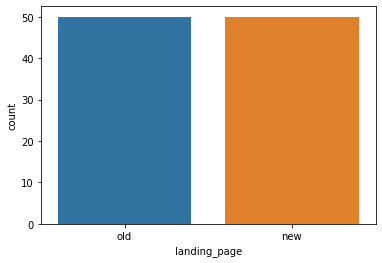

In [ ]:
# A count plot can be used in order to visualize the amount of users that were tested on the new or old landing page
sns.countplot(data=df, x='landing_page')
plt.show()

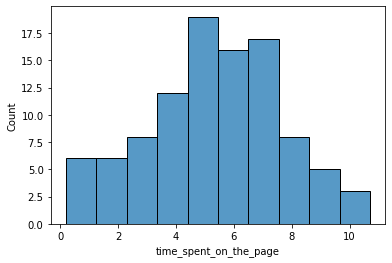

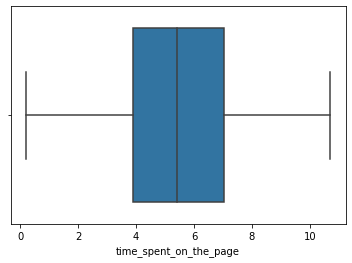

In [ ]:
# With a histogram we can see the amount of time the bins of the histogram spend on the page.
# We can see that a majority of people spend around 5 to 6 minutes on the page.
sns.histplot(data=df, x = 'time_spent_on_the_page', bins = 10)
plt.show()
sns.boxplot(data=df, x = 'time_spent_on_the_page')
plt.show()

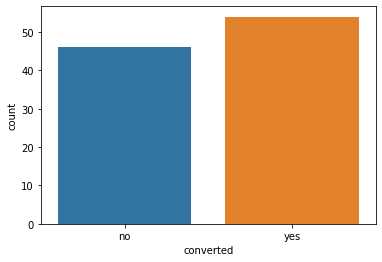

In [ ]:
# Using a count plot we can see the amount of people who were converted compared to those who were not.
sns.countplot(data=df, x = 'converted')
plt.show()

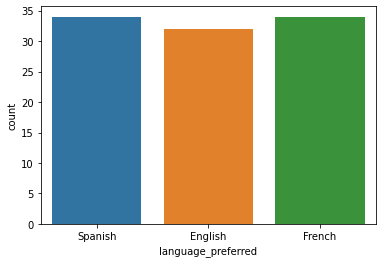

In [ ]:
# This count plot lets us compare the amount of users and which language they perfer to use.
# We can see that every language is equally represented.
sns.countplot(data=df, x = 'language_preferred')
plt.show()

### Bivariate Analysis

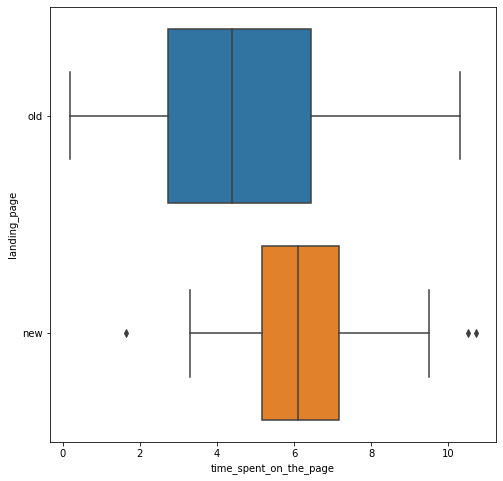

In [ ]:
# By comparing the time spent on the old page versus the new page we can see which website kept had the better retention rate.
plt.figure(figsize = (8,8))
sns.boxplot(data=df, x = 'time_spent_on_the_page', y = 'landing_page')
plt.show()

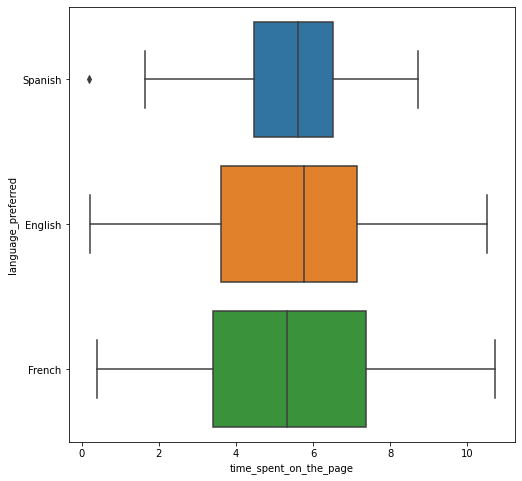

In [ ]:
# By comparing the time spent on the page and the language preferred we can make conclusions on which language had the best user retention. 
plt.figure(figsize = (8,8))
sns.boxplot(data=df, x = 'time_spent_on_the_page', y = 'language_preferred')
plt.show()

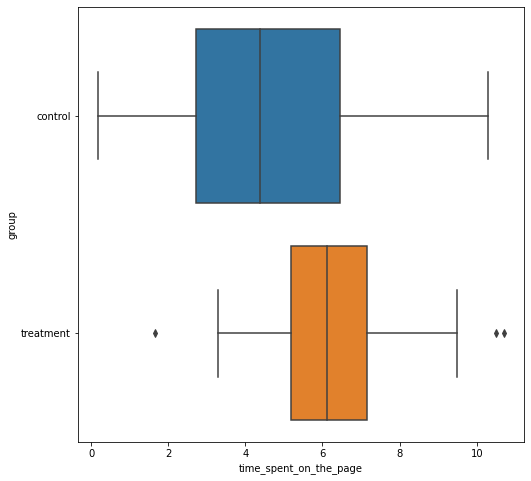

In [ ]:
# This is the same graph as the time spent vs. landing page and the same conclusions can be made.
plt.figure(figsize = (8,8))
sns.boxplot(data=df, x = 'time_spent_on_the_page', y = 'group')
plt.show()

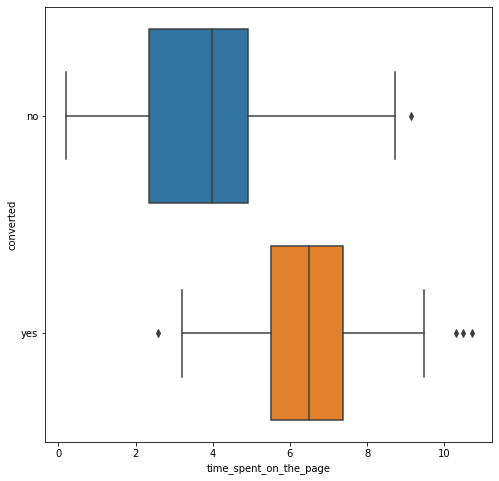

In [ ]:
# We can see that the more time that a user spends on a page then they are more likely to convert.
plt.figure(figsize = (8,8))
sns.boxplot(data=df, x = 'time_spent_on_the_page', y = 'converted')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

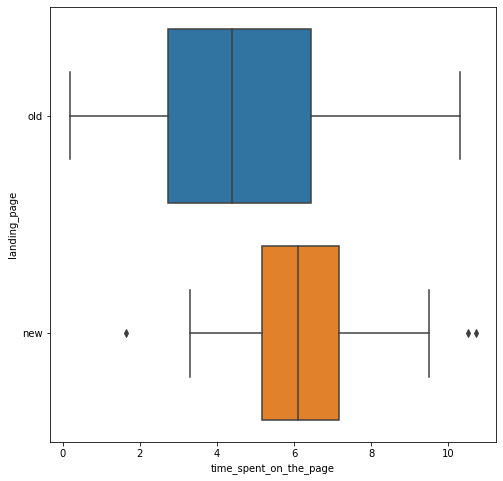

In [ ]:
# We can use the previously defined graph from bivariate analysis
plt.figure(figsize = (8,8))
sns.boxplot(data=df, x = 'time_spent_on_the_page', y = 'landing_page')
plt.show()
# By looking at the graph we can see that users are spending more time on the new landing page rather than the old landing page.

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: Users do not spend more time on the new landing page than the existing page.

Alternate Hypothesis: Users do spend more time on the new landing page than the existing page.

### Step 2: Select Appropriate test

The most appropriate test to use is T-test since we are comparing two independent populations where the standard deviation is not known.

### Step 3: Decide the significance level

The significance level will be 5%, 0.05, as given to us in the problem. 

### Step 4: Collect and prepare data

In [ ]:
# We are going to prepare the data by create new sets isolating the new and old of the landing_page column.
new_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
# Use the .std() in order to find the standard deviation
new_time.std()

1.8170310387878263

In [ ]:
# We find the standard deviation of both and notice that they are not equal.
old_time.std()

2.581974849306046

### Step 5: Calculate the p-value

In [ ]:
# We import in the ttest_ind function since we are decided the t-test of independent populations was the appropriate test.
# And since the standard variantion is not the same neither is the variance thus the neccessity for equal_var=False
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(new_time,old_time, equal_var = False)
print('The p-value is',p_value)

The p-value is 0.0002784762450333098


### Step 6: Compare the p-value with $\alpha$

Since the p-value, 0.0002784762450333098, is less than 0.05 then we reject the null hypothesis.

### Step 7:  Draw inference

Since we rejected the null hypothesis we can draw the inference that users do spend more time on the new landing page rather than the old one. Furthermore, you can infer that the new design is more effective. More time spent on the website means more opportunities for people to subscribe to it.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

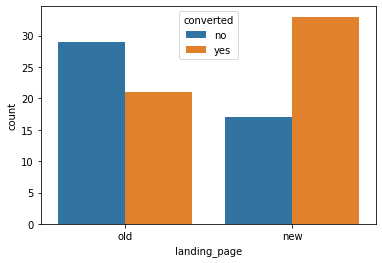

In [ ]:
# A count plot can be used visualize the new vs old landing page and whether or not they were converted.
sns.countplot(data=df, x = 'landing_page', hue = 'converted')
plt.show()

Null Hypothesis: The conversion rate of the new page is not greater than the conversion rate of the old page.

Alternate Hypothesis: The converson rate of the new page is greater than that conversion rate of the old page.

For this question we will be using a Two propotion Z-test since we are comparing two population proportions from two independent populations.

The significance level will be 5%, 0.05, as given to us in the problem. 

In [ ]:
# First we must prepare the data and we do this by counting the the amount of converted in the different groups control vs treatment.
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

In [ ]:
# Import the proportions_ztest function since we are comparing two population propotions from two independent populations
from statsmodels.stats.proportion import proportions_ztest

# In the function we use the amount of converted and the total amount of users, 50, in order to make the proportion and find the p-value.
test_stat, p_value = proportions_ztest([new_converted, old_converted],[50,50], alternative = 'larger')
print('The p-value is',p_value)

The p-value is 0.008026308204056278


Since the p-value, 0.008026308204056278, is less than 0.05 then we reject the null hypothesis. 

### Draw Inference

Since we rejected the null hypothesis we can infer that the conversion rate for the new page is greater than the old page. This means that the new page is better at getting subscriptions than the old page meaning the new design was successful. More subcriptions means more profit and exposure for the company.

## 3. Is the conversion and preferred language are independent or related?

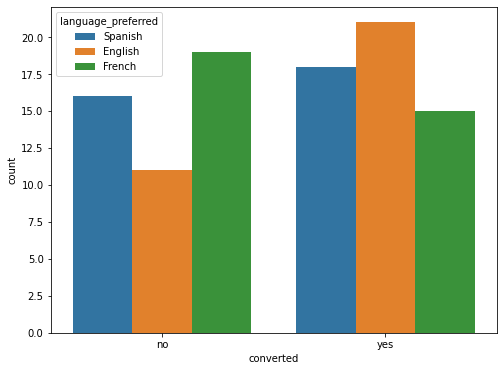

In [ ]:
# We can use a count plot to visualize converted vs language preferred to see if they are related.
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'converted', hue = 'language_preferred')
plt.show()

Null Hypothesis: The conversion is independent of preferred language.

Alternative Hypothesis: The conversion is related to preferred language.

The test that we will be using for this question is the Chi Square test since we are dealing with a test of independence between multiple variables.

The significance level will be 5%, 0.05, as given to us in the problem. 

In [ ]:
# Because we are doing a Chi Square test a contingency table will be useful to show the distribution of the variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred']) 
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
# Importing in the correct function chi2_contingency
from scipy.stats import chi2_contingency

# By putting the contingency table in the chi2_contingency fucntion we can easily calculate the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


Since the p-value, 0.21298887487543447, is greater than 0.05 then we fail to reject the null hypothesis.

### Draw inference

Since we fail to reject the null hypothesis we can infer that conversion is independent to the preferred language, and the language you use does not affect the chances of getting a subscription. 

## 4. Is the time spent on the new page same for the different language users?

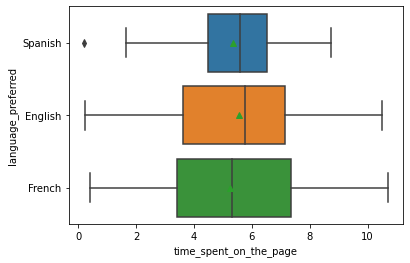

In [ ]:
# First we have to filter out everyone who was on the old page and only have those on the new page.
df_new_page = df[df['landing_page'] == 'new']

# We can compare the time spend vs language preferred on the new page only to see if they are the same.
# We use showmeans = True since we will be using an ANOVE F-test, comparing the three means.
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True)
plt.show()

In [ ]:
# Since we are comparing the means it is nice to know what they are a head of time.
df_new_page.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

Null Hypothesis: The time spent on the new page is the same for different language users.

Alternative Hypothesis: The time spent on the new page is not the same for different language users.

Since we are comparing more than two means we will be using an ANOVA F-test

The significance level will be 5%, 0.05, as given to us in the problem. 

In [ ]:
# We can prepare the data by creating new sets one for each language and the amount of time they spent.
english_time = df_new_page[df_new_page['language_preferred']=='English']['time_spent_on_the_page']
french_time = df_new_page[df_new_page['language_preferred']=='French']['time_spent_on_the_page']
spanish_time = df_new_page[df_new_page['language_preferred']=='Spanish']['time_spent_on_the_page']

In [ ]:
# Importing in the appropriate function
from scipy.stats import levene

# Using the prepared data we can find the p-value
statistic, p_value = levene(english_time, french_time, spanish_time)
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value, 0.21298887487543447, is greater than 0.05 then we fail to reject the null hypothesis.

### Draw inferences

Since we fail to reject the null hypothesis the time spent on the new page is the same for different language users. This can be seen in the graph where the shown means are very close to each other.

## Conclusion and Business Recommendations

With the questions answer and inferences drawn we can make some conclusion about the data given. First off, the new design of the landing page was a big improvement from the old page, and it made users spend more time on the page as well as get more subscriptions.

As far as recomendations, the converted and language preferred variables were independent of each other and each language spend similar amounts of time on the website; however, having those different languages is not a bad thing since it only provides more accessibility and expands the potential range of people who might get a subscription.


Furthermore, since the redesign of the langing page was a success it may be benefitial to look into and survey those who were converted, or who spend a lot of time on the website, to see what part of the website they liked, and expand and add to the good parts.

___